In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [2]:
cred_df=pd.read_csv(r'C:\Users\Asus\Downloads\credits.csv')

In [3]:
title_df=pd.read_csv(r'C:\Users\Asus\Downloads\titles.csv')

#Explore Credit dataset

In [4]:
cred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


In [ ]:
#calculate the %of missing data

In [10]:
round(100*(cred_df.isnull().sum()/len(cred_df.index)),2).sort_values(ascending=False)

person_id    0.0
id           0.0
name         0.0
character    0.0
role         0.0
dtype: float64

In [9]:
#character has 13% missing values. So let's add the null values with 'Not defined'
cred_df['character'].replace(np.nan,'Not defined',inplace=True)

In [15]:
#Check for duplicates
cred_df.duplicated().sum()

0

In [14]:
cred_df.drop_duplicates(inplace=True)

In [ ]:
#Explore Title dataset


In [17]:
title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [ ]:
#lets calcualte the % of missing(nulls) for each col

In [18]:
round(100*title_df.isnull().sum()/len(title_df.index),2).sort_values(ascending=False)

seasons                 86.25
age_certification       65.72
tmdb_score              21.09
imdb_votes              10.44
imdb_score              10.34
imdb_id                  6.76
tmdb_popularity          5.54
description              1.21
id                       0.00
title                    0.00
type                     0.00
release_year             0.00
runtime                  0.00
genres                   0.00
production_countries     0.00
dtype: float64

In [ ]:
#seasons and age_certificationss has more than 60% missing data. So dropping them would be better approach

In [20]:
title_df = title_df.drop(columns = ['seasons', 'age_certification'])

In [21]:
# impute values rest of the null columns
title_df['tmdb_score'] = title_df['tmdb_score'].fillna(title_df['tmdb_score'].mode()[0])
title_df['imdb_votes'] = title_df['imdb_votes'].fillna(title_df['imdb_votes'].mode()[0])
title_df['imdb_score'] = title_df['imdb_score'].fillna(title_df['imdb_score'].mode()[0])
title_df['tmdb_popularity'] = title_df['tmdb_popularity'].fillna(title_df['tmdb_popularity'].mode()[0])
title_df['imdb_id'].replace(np.nan, 'No Data',inplace  = True)
title_df['description'].replace(np.nan, 'No Data',inplace  = True)

In [22]:
title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9871 non-null   object 
 4   release_year          9871 non-null   int64  
 5   runtime               9871 non-null   int64  
 6   genres                9871 non-null   object 
 7   production_countries  9871 non-null   object 
 8   imdb_id               9871 non-null   object 
 9   imdb_score            9871 non-null   float64
 10  imdb_votes            9871 non-null   float64
 11  tmdb_popularity       9871 non-null   float64
 12  tmdb_score            9871 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 1002.6+ KB


In [23]:
title_df.head()

,id,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,171,"['romance', 'war', 'drama']",['US'],tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,92,"['comedy', 'drama', 'romance']",['US'],tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,94,"['thriller', 'drama', 'romance']",['US'],tt0042593,7.9,30924.0,8.273,7.6


In [25]:
title_df['production_countries'].unique()

array(["['US']", "['GB']", "['MX', 'US']", "['GB', 'CA']", "['DE', 'US']",
       "['SU']", '[]', "['IN']", "['CA', 'US']", "['MX']", "['XX']",
       "['US', 'IT']", "['JP']", "['IT', 'FR']", "['HK']",
       "['FR', 'DE', 'IT']", "['ES', 'IT']", "['GB', 'US']",
       "['IL', 'US']", "['US', 'FR', 'IT']", "['IT']",
       "['IT', 'GB', 'US']", "['GB', 'US', 'IT', 'MX', 'ES']",
       "['AU', 'US']", "['CH', 'GB']", "['CA', 'FR']", "['US', 'IE']",
       "['GB', 'IT']", "['IT', 'US']", "['FR']", "['GR', 'US']", "['DE']",
       "['HK', 'US', 'CN']", "['US', 'ES']", "['PH', 'US']",
       "['NL', 'US']", "['FR', 'US']", "['IT', 'YU']",
       "['FR', 'DE', 'CH', 'CI']", "['PR', 'US']", "['US', 'PH']",
       "['YU', 'US']", "['IT', 'MX']", "['IT', 'ES', 'DE', 'LI']",
       "['US', 'CA']", "['US', 'GB']", "['US', 'DE']",
       "['US', 'IT', 'FR']", "['CA']", "['FR', 'GB']", "['JP', 'KR']",
       "['GR']", "['ES']", "['US', 'JP']", "['SU', 'US']", "['FR', 'DE']",
       "['FR', 'IT']"

In [29]:
title_df['production_countries1'] = title_df['production_countries'].str[2:4]
for i in range(len(title_df['production_countries'])):
    if title_df['production_countries'][i] == '':
        title_df['production_countries1'][i] = 'Unknown'

In [35]:
title_df.sample(5)

,id,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,production_countries1
8294,ts225989,"Hey Sensei, Don't you know?",SHOW,A love story between a comic artist with no ex...,2019,24,"['drama', 'romance']",kn,tt12093584,6.3,113.0,3.629,5.0,
8781,tm516036,Katha Sangama,MOVIE,Katha Sangama is an upcoming Indian anthology ...,2019,156,"['thriller', 'drama', 'family', 'fantasy']",kn,tt7315232,7.4,312.0,1.960,5.0,
1574,tm261607,"Brother, Cry For Me",MOVIE,Three estranged brothers receive a mysterious ...,1970,92,['crime'],kn,tt0212004,4.9,24.0,0.881,6.0,
3360,tm39398,The Hive,MOVIE,"When ants, displaying never-before-seen behavi...",2008,90,"['scifi', 'horror', 'thriller', 'action']",kn,tt1062161,3.2,1761.0,3.513,4.2,
3066,tm85533,King Naresuan 2,MOVIE,Prince Naresuan is now the crown prince of Ayu...,2007,165,"['drama', 'history', 'war', 'action']",kn,tt0975744,7.2,413.0,4.010,6.3,


EDA Visulizations:

In [ ]:
#Title DF Viz.

Text(0.5, 1.0, 'Movies released each year')

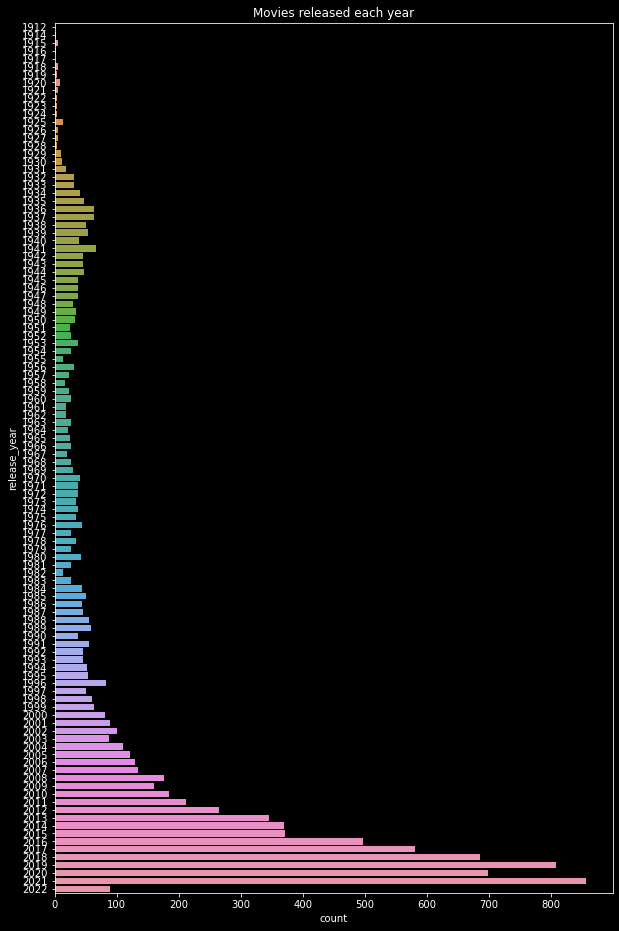

In [62]:
#Let's visulalixe no.of movies released year wise .
plt.figure(figsize=(10,16))
sns.countplot(y='release_year',data=title_df)
plt.title('Movies released each year')

Text(0.5, 1.0, 'Movies released each year')

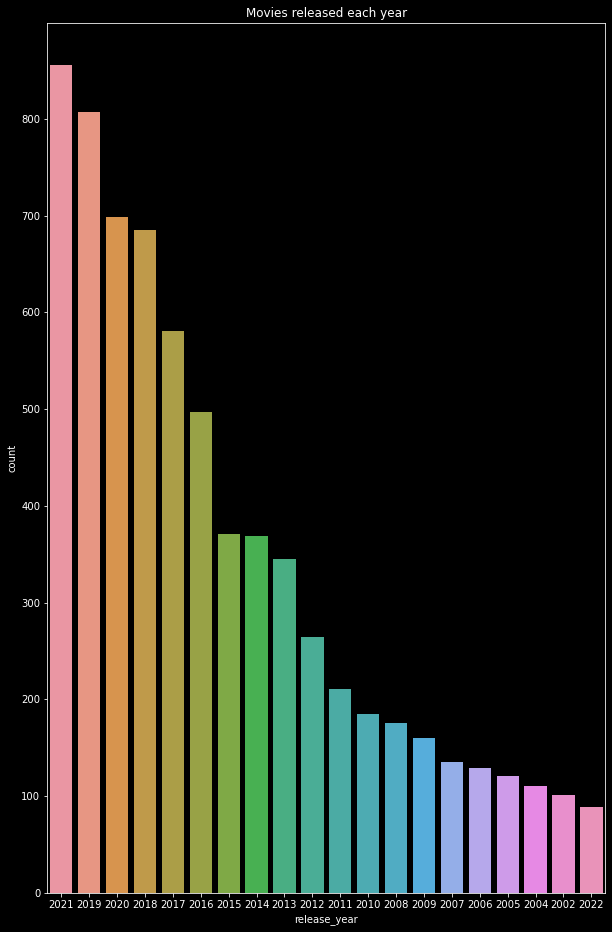

In [68]:
#Let's visulalixe no.of movies released in the last 20 yrs .
plt.figure(figsize=(10,16))
sns.countplot(x='release_year',order=title_df['release_year'].value_counts().index[:20],data=title_df)
plt.title('Movies released each year')

Text(0.5, 1.0, 'Movies Vs Shows')

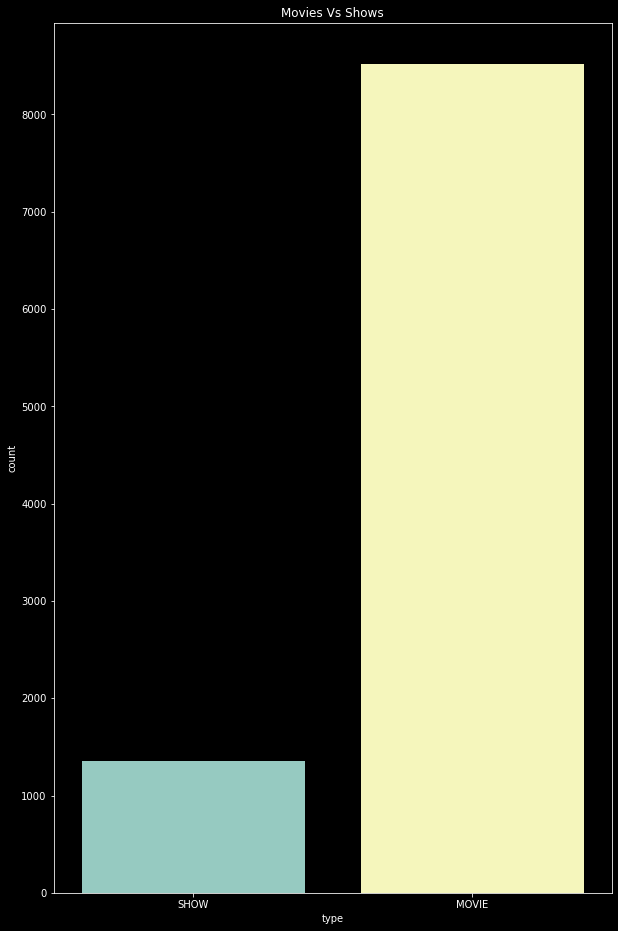

In [72]:
plt.figure(figsize=(10,16))
sns.countplot(x='type',data=title_df)
plt.title('Movies Vs Shows')

<AxesSubplot:title={'center':'Top Production Countries'}, xlabel='production_countries', ylabel='count'>

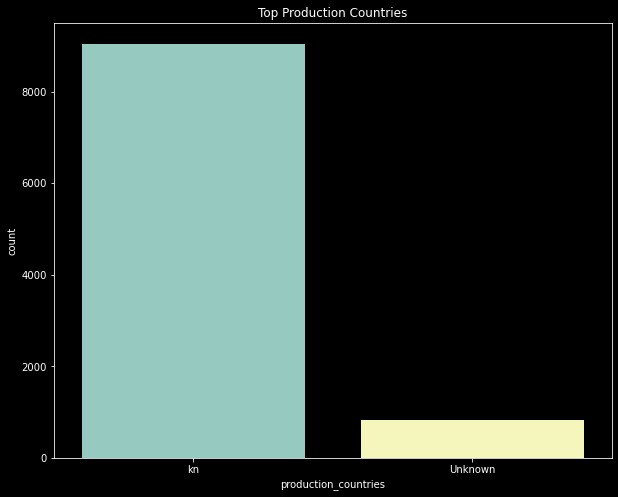

In [73]:
#Top Production Countries in which movies and TV shows were addded
plt.figure(figsize = (10,8))
plt.title('Top Production Countries')
sns.countplot(x='production_countries', data = title_df,order = title_df['production_countries'].value_counts().index[:10] ,linewidth =5)

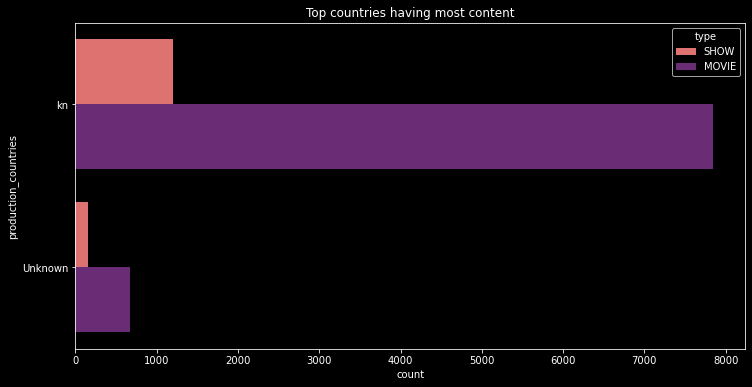

In [76]:
fig = plt.figure(figsize=(12,6))
sns.countplot(data = title_df,y = 'production_countries', order = title_df["production_countries"].value_counts().index[0:10],hue = 'type',palette = 'magma_r')
plt.title("Top countries having most content")
plt.show()
        

<AxesSubplot:xlabel='type', ylabel='imdb_score'>

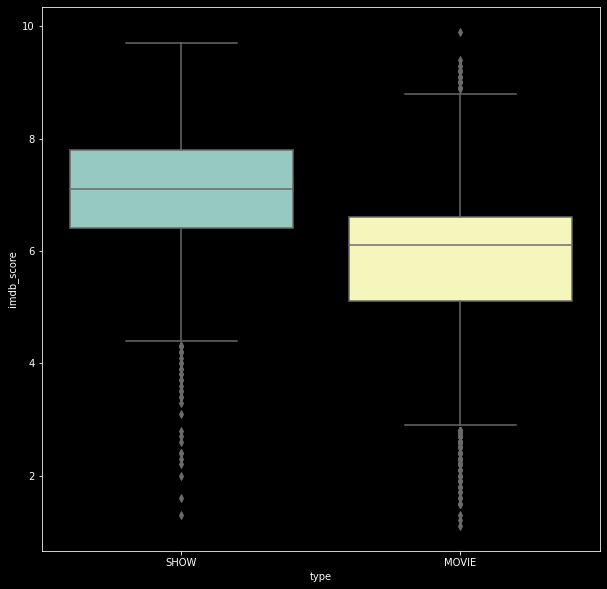

In [93]:
#TOP IMDB Scored movies
plt.figure(figsize=(10,10))
sns.boxplot(y='imdb_score',x='type',data=title_df)


In [95]:
df1=title_df[['title','imdb_score']]
df1.shape

(9871, 2)

In [98]:
df1.drop_duplicates()

,title,imdb_score
0,The Three Stooges,8.6
1,The General,8.2
2,The Best Years of Our Lives,8.1
3,His Girl Friday,7.8
4,In a Lonely Place,7.9
...,...,...
9866,Lily Is Here,5.3
9867,Jay Nog: Something from Nothing,6.4
9868,Chasing,6.4
9869,Baikunth,8.4
